# **How to decide what to watch on Netflix? - Random Forest Classifier**

New movies come out on Netflix every month, some I have never heard of. Is it possible to build a model that will tell me if a movie is worth watching based on a subset of movie parameters? 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../Resources/cleaned_data.csv")
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Directors,Genres,Country,Runtime,production_company,Top_Genres,Top_Director
0,Inception,2010,13+,8.8,8.7,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller",United States,148.0,Warner Bros.,Action,Christopher Nolan
1,The Matrix,1999,18+,8.7,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,136.0,NaN,Action,Lana Wachowski
2,Avengers: Infinity War,2018,13+,8.5,8.4,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,149.0,NaN,Action,Anthony Russo
3,Back to the Future,1985,7+,8.5,9.6,1,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,116.0,NaN,Adventure,Robert Zemeckis
4,"The Good, the Bad and the Ugly",1966,18+,8.8,9.7,1,0,1,0,Sergio Leone,Western,Italy,161.0,NaN,Western,Sergio Leone


In [3]:
df = df[["Year", "Country", "Runtime", "Top_Genres", "IMDb"]]
df = df.rename(columns={"Top_Genres":"Genre"})
df = df.dropna()
df["Runtime"] = df[["Runtime"]].round(0).astype(int)
df["IMDb"] = (df["IMDb"]*10).round(0).astype(int)
df.head()

,Year,Country,Runtime,Genre,IMDb
0,2010,United States,148,Action,88
1,1999,United States,136,Action,87
2,2018,United States,149,Action,85
3,1985,United States,116,Adventure,85
4,1966,Italy,161,Western,88


In [4]:
df["Genre"].unique()

array(['Action', 'Adventure', 'Western', 'Animation', 'Biography',
       'Drama', 'Crime', 'Comedy', 'Documentary', 'Family', 'Horror',
       'Thriller', 'Mystery', 'Fantasy', 'Romance', 'Short', 'Sci-Fi',
       'Sport', 'Reality-TV', 'Musical', 'Music', 'War', 'History',
       'Film-Noir', 'Talk-Show', 'Game-Show'], dtype=object)

In [5]:
cleanup_genre = {"Genre": {'Action': 5, 'Adventure': 5, 'Western': 3, 'Animation': 7, 'Biography': 1,
       'Drama': 8, 'Crime': 5, 'Comedy': 4, 'Documentary': 1, 'Family': 8, 'Horror': 6,
       'Thriller': 5, 'Mystery': 5, 'Fantasy': 7, 'Romance': 8, 'Short': 7, 'Sci-Fi': 6,
       'Sport': 2, 'Reality-TV': 4, 'Musical': 7, 'Music': 7, 'War': 3, 'History': 1,
       'Film-Noir': 6, 'Talk-Show': 4, 'Game-Show': 4}}

In [6]:
df = df.replace(cleanup_genre)
df.head()

,Year,Country,Runtime,Genre,IMDb
0,2010,United States,148,5,88
1,1999,United States,136,5,87
2,2018,United States,149,5,85
3,1985,United States,116,5,85
4,1966,Italy,161,3,88


In [7]:
df.loc[df["Country"] == "United States", "Country"] = 1
df.loc[df["Country"] != 1, "Country"] = 0
df["Country"] = df["Country"].astype(int)
df.head()

,Year,Country,Runtime,Genre,IMDb
0,2010,1,148,5,88
1,1999,1,136,5,87
2,2018,1,149,5,85
3,1985,1,116,5,85
4,1966,0,161,3,88


In [8]:
df.loc[df["IMDb"] < 70, "IMDb"] = 0
df.loc[df["IMDb"] >= 70, "IMDb"] = 1

In [9]:
df["IMDb"].value_counts()

0    12037
1     3662
Name: IMDb, dtype: int64

In [10]:
df.head()

,Year,Country,Runtime,Genre,IMDb
0,2010,1,148,5,1
1,1999,1,136,5,1
2,2018,1,149,5,1
3,1985,1,116,5,1
4,1966,0,161,3,1


In [11]:
target = df["IMDb"].values.reshape(-1, 1)
target_names = ["Bad", "Good"]
data = df.drop("IMDb", axis=1)
feature_names = data.columns

data.head()

,Year,Country,Runtime,Genre
0,2010,1,148,5
1,1999,1,136,5
2,2018,1,149,5
3,1985,1,116,5
4,1966,0,161,3


In [12]:
df.dtypes

Year       int64
Country    int64
Runtime    int64
Genre      int64
IMDb       int64
dtype: object

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

<ipython-input-14-48fcf54f9ca3>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = rf.fit(X_train, y_train)


0.7503184713375797

In [15]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.45482456026813584, 'Runtime'),
 (0.3382973550381322, 'Year'),
 (0.18583427738071115, 'Genre'),
 (0.021043807313020836, 'Country')]

In [16]:
importances = sorted((rf.feature_importances_*100), reverse=True)

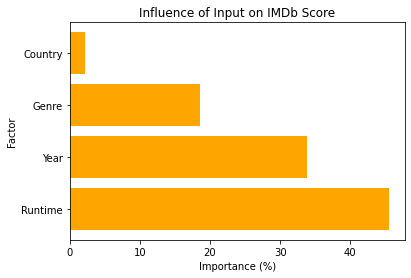

In [17]:
x = ["Runtime", "Year", "Genre", "Country"]
plt.barh(x,importances, color="Orange")
plt.title("Influence of Input on IMDb Score")
plt.xlabel('Importance (%)')
plt.ylabel('Factor')
plt.show()